In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [62]:

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

n = 32
lr = 0.001

In [63]:
w1 = np.random.rand(n,n) * np.sqrt(2/n)
b1 = np.random.rand(n,1)
w2 = np.random.rand(n,n) * np.sqrt(2/n)

In [64]:
def modelo(x):
    z1 = w1 @ x + b1
    a1 = np.sin(z1)
    z2 = w2 @ a1
    
    return z2 

In [65]:
#Constante para probar el modelo
t = np.linspace(0,1,n).reshape(n,1)


In [66]:
#Función que queremos interpolar
def true_f(x):
    return np.cos(2*np.pi*x**0.5) + np.exp(-x**2)

In [67]:
#Funcion de pérdida y su derivada
def loss(x):
    return np.mean( np.square( ((modelo(x) )  - (true_f(x)) )))

def loss_derivative(x):
    return 2/n *( ( (modelo(x)) - (true_f(x))) )

In [68]:
def gradiente(x,w1,w2,b1,i):
    z1 = w1 @ x + b1
    a1 = np.sin(z1)
    z2 = w2 @ a1
    

    dw2 = loss_derivative(x) @ a1.T
    dw1 = (w2.T @ loss_derivative(x)) * (np.cos(z1)) @ x.T 
    db1 = (w2.T @ loss_derivative(x)) * (np.cos(z1))
        
    return dw1, db1, dw2

In [69]:
##Entrenamiento
Epochs = 10000
loss_array = np.zeros(Epochs)
x = np.linspace(0,1,n).reshape(n,1)
for i in range(Epochs):
    
    g = gradiente(x,w1,w2,b1,i)
    dw1 = g[0]
    db1 = g[1]
    dw2 = g[2]
       
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    
    loss_array[i] = loss(x).mean()
    if i%50 == 0:
        print("Epoch: " , i, " Loss: ", loss_array[i])

Epoch:  0  Loss:  1.7841097823815386
Epoch:  50  Loss:  0.977668651329365
Epoch:  100  Loss:  0.6183816687243737
Epoch:  150  Loss:  0.4604831119208057
Epoch:  200  Loss:  0.38745642016428805
Epoch:  250  Loss:  0.349299666592011
Epoch:  300  Loss:  0.32549299666955783
Epoch:  350  Loss:  0.30777869622108034
Epoch:  400  Loss:  0.29285142286398125
Epoch:  450  Loss:  0.27937830081793125
Epoch:  500  Loss:  0.2668079028633038
Epoch:  550  Loss:  0.2548990404225869


Epoch:  600  Loss:  0.24353522570354014
Epoch:  650  Loss:  0.23265164370643127
Epoch:  700  Loss:  0.2222062507656308
Epoch:  750  Loss:  0.21216815345829698
Epoch:  800  Loss:  0.20251276549856653
Epoch:  850  Loss:  0.1932196412609687
Epoch:  900  Loss:  0.18427138425282594
Epoch:  950  Loss:  0.17565300342073506
Epoch:  1000  Loss:  0.16735146998178335
Epoch:  1050  Loss:  0.159355375660425
Epoch:  1100  Loss:  0.15165465124817046
Epoch:  1150  Loss:  0.1442403273234773
Epoch:  1200  Loss:  0.13710432817632667
Epoch:  1250  Loss:  0.13023929380210802
Epoch:  1300  Loss:  0.12363842650745321
Epoch:  1350  Loss:  0.11729535947664214
Epoch:  1400  Loss:  0.11120404508303817
Epoch:  1450  Loss:  0.10535866099793094
Epoch:  1500  Loss:  0.09975353233379311
Epoch:  1550  Loss:  0.09438306819812728
Epoch:  1600  Loss:  0.08924171114645305
Epoch:  1650  Loss:  0.08432389811891289
Epoch:  1700  Loss:  0.07962403153083723
Epoch:  1750  Loss:  0.07513645926757974
Epoch:  1800  Loss:  0.070855

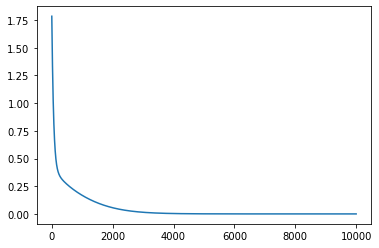

In [70]:
#Graficar Perdida
plt.plot(loss_array)

Error medio: 0.607961018325557


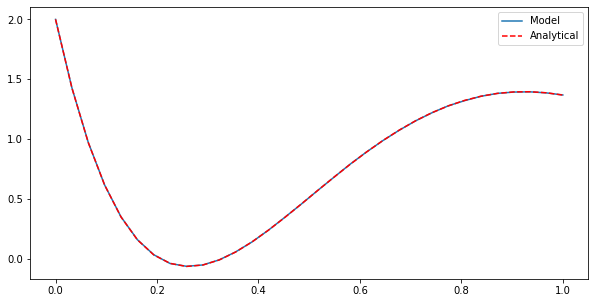

In [71]:
plt.figure(figsize=(10,5))

x = np.linspace(0,1,n).reshape(-1,1)
print("Error medio:", np.mean(np.abs( (modelo(x) - true_f(x))/true_f(x)) )*100 ) 
plt.plot(x,modelo(x) , label = 'Model')
plt.plot(x,true_f(x), '--r',label = 'Analytical')
plt.legend()
plt.show()